In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
import pandas as pd

In [152]:
iris = datasets.load_iris()

In [243]:
data = pd.DataFrame(iris.data[:,:])
data['target'] = iris.target

In [169]:
#get the data
X = data.iloc[:,:2].values
y = data.iloc[:,4].values  

In [170]:
print X.shape , y.shape

(150, 2) (150,)


In [171]:
def cross_validation(model,k,X,y):
    a=[]
    folds = KFold(n=len(y),n_folds=5)
    for i, j in folds:
        train_x = X[i]
        train_y = y[i]
        model.fit(train_x,train_y)
        pred = model.predict(X[j])
        a.append(accuracy_score(y_pred=pred,y_true=y[j]))
    return np.mean(a)

In [180]:
clf = svm.SVC(kernel='linear',C=1, gamma=0.5)
cross_validation(clf,5,X,y)

0.6133333333333334

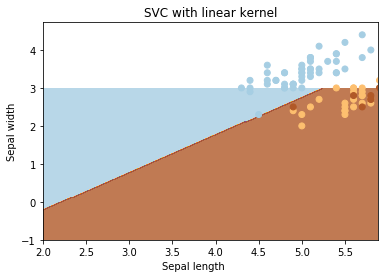

In [181]:
xmin,xmax = X[1].min()-1,X[1].max()+1 
ymin,ymax = y.min()-1,y.max()+1 
h = 0.02
#h = (xmax / xmin)/100
xx,yy=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
temp=np.c_[xx.ravel(), yy.ravel()]
plt.subplot(1, 1, 1)
Z = clf.predict(temp)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length           ')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()
plt.show()

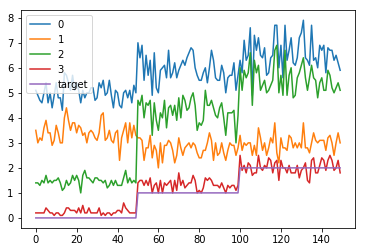

In [188]:
data.cumsum()
data.plot()
plt.show()

# PANDAS OPERATION

In [190]:
data.columns

Index([0, 1, 2, 3, u'target'], dtype='object')

In [193]:
data[data.columns[[1,2]]]


,1,2
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
5,3.9,1.7
6,3.4,1.4
7,3.4,1.5
8,2.9,1.4
9,3.1,1.5


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0         150 non-null float64
1         150 non-null float64
2         150 non-null float64
3         150 non-null float64
target    150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


In [201]:
data.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [238]:
print data.head()
#adding data
data.loc[5] = [1.2,3.2,32.2,3.5,0.0]

     0    1    2    3  target
0  5.1  3.5  1.4  0.2       0
1  4.9  3.0  1.4  0.2       0
2  4.7  3.2  1.3  0.2       0
3  4.6  3.1  1.5  0.2       0
4  5.0  3.6  1.4  0.2       0


In [239]:
#removing row
data=data.drop(5)

In [240]:
data.target.value_counts()

2.0    50
1.0    50
0.0    49
Name: target, dtype: int64

In [244]:
#the targert column has 0 and 1 and 2 change to boolean

data.target =data.target.map({1.0:True,
                 2.0:True,
                 0.0:False})
data.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,False
1,4.9,3.0,1.4,0.2,False
2,4.7,3.2,1.3,0.2,False
3,4.6,3.1,1.5,0.2,False
4,5.0,3.6,1.4,0.2,False


In [253]:
#REPLACE 
data[3] = data[3].replace(0.2,'No')
data[3].value_counts()
data[3] = data[3].replace('No',0.2)
data[3].value_counts()


0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     6
2.0     6
2.1     6
0.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
3.5     1
Name: 3, dtype: int64

In [241]:
#sorting by target ascending
#multi columsn 
data.sort_values(by=[1,2], ascending=[False, True]).head()
#data.sort_values(by='target', ascending=False).head()

,0,1,2,3,target
15,5.7,4.4,1.5,0.4,0.0
33,5.5,4.2,1.4,0.2,0.0
32,5.2,4.1,1.5,0.1,0.0
14,5.8,4.0,1.2,0.2,0.0
16,5.4,3.9,1.3,0.4,0.0


In [254]:
#new data
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [259]:
data= pd.DataFrame(data)

In [260]:
data

,age,animal,priority,visits
0,2.5,cat,yes,1
1,3.0,cat,yes,3
2,0.5,snake,no,2
3,NaN,dog,yes,3
4,5.0,dog,no,2
5,2.0,cat,no,3
6,4.5,snake,no,1
7,NaN,cat,yes,1
8,7.0,dog,no,2
9,3.0,dog,no,1


In [266]:
data.pivot_table(index='animal',columns='visits',values='age',aggfunc='mean')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.5
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


# Difficult

In [278]:
#You have a DataFrame df with a column 'A' of integers. For example:

df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

How do you filter out rows which contain the same integer as the row immediately above?

In [274]:
#moves a row down
print df.A.shift()

# to filter rows that are not same as immediate next row
print df.loc[df.A.shift() != df.A ]

0     NaN
1     1.0
2     2.0
3     2.0
4     3.0
5     4.0
6     5.0
7     5.0
8     5.0
9     6.0
10    7.0
Name: A, dtype: float64
   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


In [279]:
df.sub(df.mean(axis=1), axis=0)

,A
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [284]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
#Which column of numbers has the smallest sum? (Find that column's label.)
df

,a,b,c,d,e,f,g,h,i,j
0,0.896793,0.908128,0.766409,0.723101,0.790632,0.103726,0.023304,0.064893,0.640111,0.210931
1,0.270658,0.244958,0.251908,0.674025,0.913664,0.973078,0.497020,0.985027,0.425604,0.925248
2,0.793419,0.937803,0.582712,0.496002,0.422222,0.161336,0.375904,0.981615,0.141532,0.955465
3,0.759128,0.715686,0.550181,0.326072,0.550717,0.108422,0.449646,0.398364,0.499217,0.118731
4,0.186282,0.100980,0.967779,0.008292,0.749493,0.422512,0.888394,0.373380,0.432412,0.956899


In [292]:
#column  having sum minimum
df.sum().min()
df.sum().idxmin()


'f'

In [296]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print df
df.groupby('grps')['vals'].nlargest(3).sum(level=0)


   grps  vals
0     a    12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a    52
8     b    54
9     c    23
10    c   235
11    c    21
12    b    57
13    b     3
14    c    87


grps
a    409
b    156
c    345
Name: vals, dtype: int64

In [311]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
df.groupby((df['X'] == 0).cumsum()).cumcount()
(df['X'] == 0).idxmax()

2

In [312]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)

In [313]:
s

2015-01-01    0.563099
2015-01-02    0.771078
2015-01-05    0.869537
2015-01-06    0.413426
2015-01-07    0.673838
2015-01-08    0.043401
2015-01-09    0.916806
2015-01-12    0.525223
2015-01-13    0.508468
2015-01-14    0.418208
2015-01-15    0.068659
2015-01-16    0.353747
2015-01-19    0.660833
2015-01-20    0.770118
2015-01-21    0.788298
2015-01-22    0.230599
2015-01-23    0.106536
2015-01-26    0.731741
2015-01-27    0.526922
2015-01-28    0.301822
2015-01-29    0.694187
2015-01-30    0.257554
2015-02-02    0.558856
2015-02-03    0.497362
2015-02-04    0.299093
2015-02-05    0.215082
2015-02-06    0.189694
2015-02-09    0.226571
2015-02-10    0.591527
2015-02-11    0.316352
                ...   
2015-11-20    0.525700
2015-11-23    0.516510
2015-11-24    0.173600
2015-11-25    0.846697
2015-11-26    0.563744
2015-11-27    0.202075
2015-11-30    0.810501
2015-12-01    0.238020
2015-12-02    0.593211
2015-12-03    0.292039
2015-12-04    0.508991
2015-12-07    0.488940
2015-12-08 

In [321]:
s.index.weekday 

Int64Index([3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
            ...
            4, 0, 1, 2, 3, 4, 0, 1, 2, 3],
           dtype='int64', length=261)

In [318]:
s.resample('M').mean()

2015-01-31    0.508823
2015-02-28    0.455254
2015-03-31    0.509380
2015-04-30    0.498850
2015-05-31    0.590403
2015-06-30    0.476461
2015-07-31    0.569057
2015-08-31    0.610301
2015-09-30    0.618234
2015-10-31    0.573939
2015-11-30    0.494572
2015-12-31    0.420363
Freq: M, dtype: float64

In [339]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

In [340]:
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045.0,LoNDon_paris,"[23, 47]"
1,<Air France> (12),NaN,MAdrid_miLAN,[]
2,(British Airways. ),10065.0,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,NaN,Budapest_PaRis,[13]
4,"""Swiss Air""",10085.0,Brussels_londOn,"[67, 32]"


In [326]:
#remove NAN and fill values using interpolate() and astype to change the data type
df['FlightNumber'].interpolate().astype(int)

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32

In [327]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
print temp

       From         To
0    LoNDon      paris
1    MAdrid      miLAN
2    londON  StockhOlm
3  Budapest      PaRis
4  Brussels     londOn


In [328]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()

In [329]:
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [342]:
df.drop('From_To', axis =1)

,Airline,FlightNumber,RecentDelays
0,KLM(!),10045.0,"[23, 47]"
1,<Air France> (12),NaN,[]
2,(British Airways. ),10065.0,"[24, 43, 87]"
3,12. Air France,NaN,[13]
4,"""Swiss Air""",10085.0,"[67, 32]"


In [345]:
df.append(temp)

,Airline,FlightNumber,From,From_To,RecentDelays,To
0,KLM(!),10045.0,NaN,LoNDon_paris,"[23, 47]",NaN
1,<Air France> (12),NaN,NaN,MAdrid_miLAN,[],NaN
2,(British Airways. ),10065.0,NaN,londON_StockhOlm,"[24, 43, 87]",NaN
3,12. Air France,NaN,NaN,Budapest_PaRis,[13],NaN
4,"""Swiss Air""",10085.0,NaN,Brussels_londOn,"[67, 32]",NaN
0,NaN,NaN,London,NaN,NaN,Paris
1,NaN,NaN,Madrid,NaN,NaN,Milan
2,NaN,NaN,London,NaN,NaN,Stockholm
3,NaN,NaN,Budapest,NaN,NaN,Paris
4,NaN,NaN,Brussels,NaN,NaN,London


In [346]:
df.join(temp)

,Airline,FlightNumber,From_To,RecentDelays,From,To
0,KLM(!),10045.0,LoNDon_paris,"[23, 47]",London,Paris
1,<Air France> (12),NaN,MAdrid_miLAN,[],Madrid,Milan
2,(British Airways. ),10065.0,londON_StockhOlm,"[24, 43, 87]",London,Stockholm
3,12. Air France,NaN,Budapest_PaRis,[13],Budapest,Paris
4,"""Swiss Air""",10085.0,Brussels_londOn,"[67, 32]",Brussels,London


In [348]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df['Airline'] 

0                KLM
1         Air France
2    British Airways
3         Air France
4          Swiss Air
Name: Airline, dtype: object

In [356]:
delays = df['RecentDelays'].apply(pd.Series)
delays.columns= ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

In [357]:
delays

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


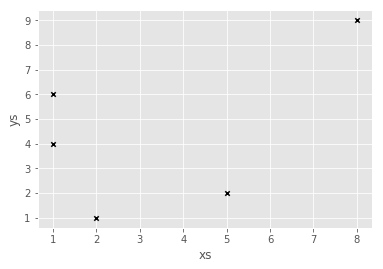

In [358]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

df.plot.scatter("xs", "ys", color = "black", marker = "x")

(-1, 12)

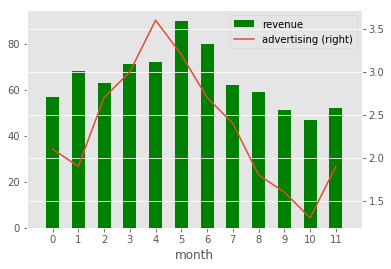

In [359]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))